# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 2</span>


### Exercise 02.1

An important part of Monte Carlo methods regards the computation of integrals that cannot be solved analytically. The idea is to estimate the value of a finite integral in the following way:

$$I =  \int_{a}^{b} f(x) \,dx = \int_{a}^{b} g(x)p(x) \,dx \approx \frac{1}{M} \sum_{i=1}^{M} g(x_i),$$

where $a < b$ and $a, b \in \mathbb{R}$. $f$ is the function that we seek to integrate over the given interval. First of all, we write $f(x) = g(x)p(x)$, where $g$ and $p$ are two suitable functions satisfying $\int_{a}^{b} p(x) \,dx = 1$. This allows us to interpret $p$ as a probability density function. If we are able to sample $x_i \in [a, b)$ $M$ times from $p$, we can approximate the integral using the sum above. 

How should we choose $p$ and $g$? We can obiously always write: 

$$g(x)p(x) = \frac{g(x)p(x)}{d(x)} d(x)$$

with $\int_{a}^{b} p(x) \,dx = 1$. It turns out that we should use a function $d$ that has a functional form (apart from its normalization) as similar as possible to $g(x)p(x)$ in order to decrease the uncertainty on the calculation(in fact: $d(x) = g(x)p(x) / I$ would lead to a variance of zero but we donnot know $I$ yet). This approach is called **importance sampling**.

Let us now focus on a particular example that we can also solve analytically:

$$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1.$$

Initially, we have $g(x) = \frac{\pi}{2}\cos(\pi x/2)$ and $p(x) = 1$, where $p$ is obviously normalized to $1$. Here, we just have to sample a uniform distribution. To apply importance sampling, we can reformulate the integrand in the following way:

$$\frac{\pi}{2}\cos(\pi x/2) = \frac{\frac{\pi}{2}\cos(\pi x/2)}{2(1-x)} \times 2(1-x),$$

such that we identifiy $d(x) = 2(1-x)$ with $\int_{0}^{1} d(x) \,dx = 2 - 1 = 1$. $d(x)$ is close to $g(x)p(x)$ as we can see in the figure below. Note, that, since $I = 1$, we ideally have $d(x) = g(x)p(x)$.

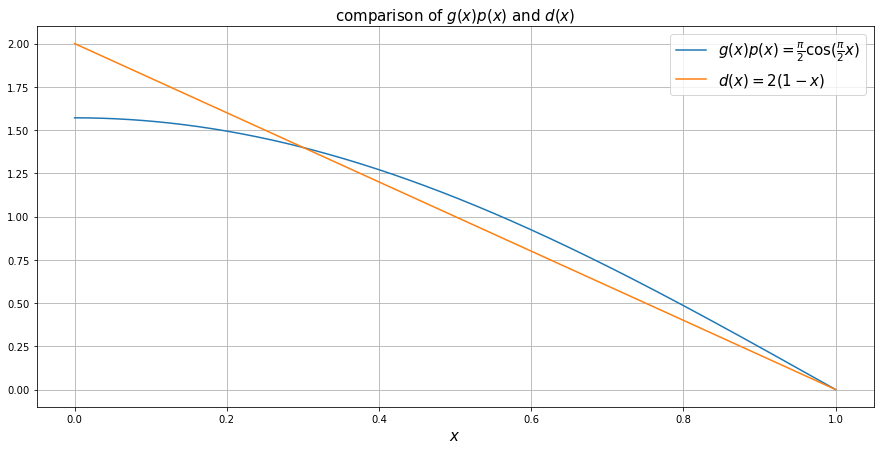

In [38]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 7))
x = np.linspace(0, 1, 1000)
y = np.pi / 2 * np.cos(np.pi * x / 2)
y_approx =  (1 - x) * 2
plt.plot(x, y, label=r"$g(x)p(x) = \frac{\pi}{2} \cos(\frac{\pi}{2} x)$")
plt.plot(x, y_approx, label=r"$d(x) = 2(1-x)$")
plt.title("comparison of $g(x)p(x)$ and $d(x)$", size=15)
plt.xlabel("$x$", size=15)
plt.legend(fontsize=15)
plt.grid()
plt.show()

Now, we are able to compute the progressive mean $\langle I \rangle$ of the estimated value of the integral as a function of the number of throws $M$ for both approaches. In total, we use a number of $M_{max}=10^5$ throws. As usual, we estimate the uncertainty using the blocking method with $N_{max} = 100$ blocks. 

Both the uniform sampling and the importance sampling converge to the exact value of $1$ of the integral. However, the uncertainty on the importance sampling computation is much smaller than that of the uniform sampling.

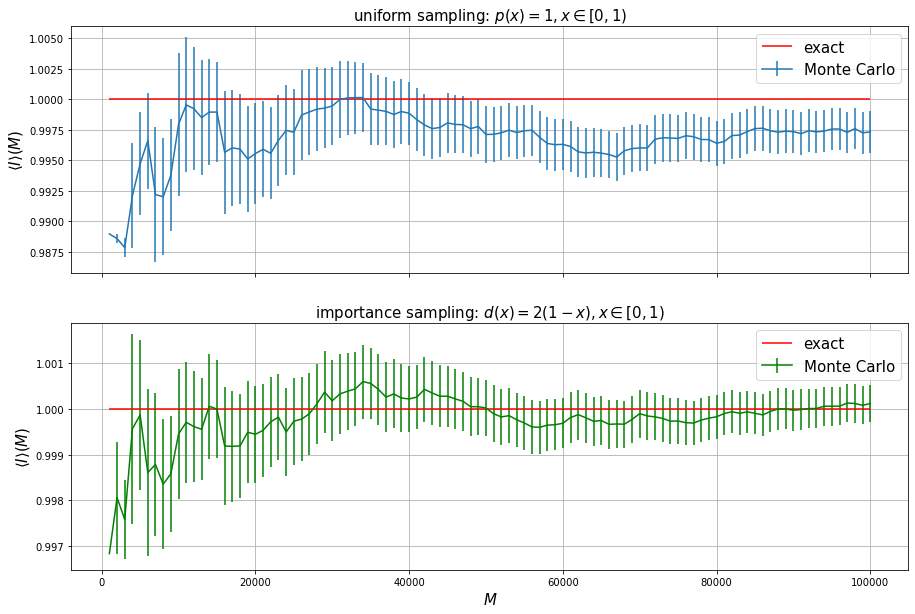

In [39]:
fig, ax = plt.subplots(2, 1, figsize=(15,10), sharex=True)

# plot calculation using uniform sampling
M_uni, I_uni, error_uni = np.loadtxt("data/I_uniform_prog.txt", delimiter=',', skiprows=1, unpack = 'True')
ax[0].errorbar(M_uni, I_uni, error_uni, label='Monte Carlo')
ax[0].hlines(1, min(M_uni), max(M_uni), color='r', label='exact')
ax[0].set_ylabel(r"$\langle I \rangle(M)$", size=15)
ax[0].set_title(r"uniform sampling: $p(x) = 1, x \in [0, 1)$", size=15)
ax[0].grid()
ax[0].legend(fontsize=15)

# plot calculation using importance sampling
M_imp, I_imp, error_imp = np.loadtxt("data/I_importance_prog.txt", delimiter=',', skiprows=1, unpack = 'True')
ax[1].errorbar(M_imp, I_imp, error_imp, color='green', label='Monte Carlo')
ax[1].hlines(1, min(M_imp), max(M_imp), color='r', label='exact')
ax[1].set_xlabel(r"$M$", size=15)
ax[1].set_ylabel(r"$\langle I \rangle(M)$", size=15)
ax[1].set_title(r"importance sampling: $d(x) = 2 (1-x), x \in [0, 1)$", size=15)
ax[1].grid()
ax[1].legend(fontsize=15)

plt.show()

In order to demonstrate the difference in the uncertainties, we visualize their dependency on $M$ in the following graph.

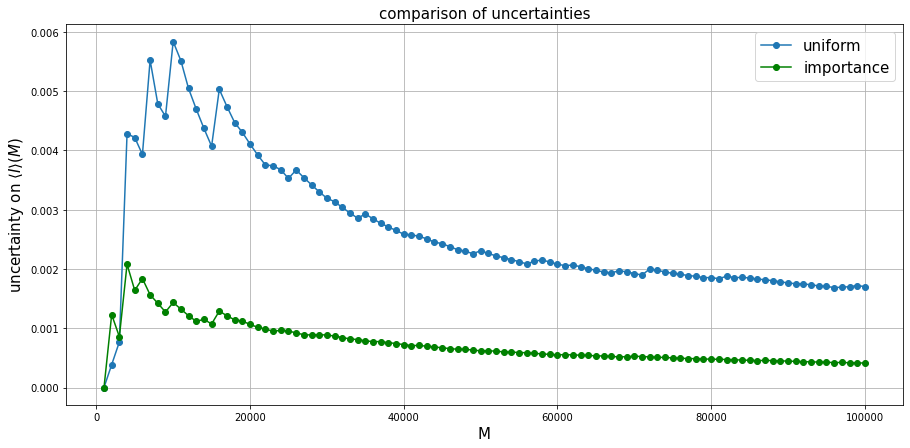

In [32]:
plt.figure(figsize=(15, 7))
plt.plot(M_uni, error_uni, label='uniform', marker='o')
plt.plot(M_imp, error_imp, color='green', label='importance', marker='o')
plt.xlabel("M", size=15)
plt.ylabel(r"uncertainty on $\langle I \rangle(M)$", size=15)
plt.title("comparison of uncertainties", size=15)
plt.grid()
plt.legend(fontsize=15)
plt.show()

### Exercise 02.2

In this exercise, we simulate a 3D random walk (RM) with $N_{max} = 100$ time steps. Our RM starts always at the origin of the 3D space. 

We use two different ways to move our walker:

- **Discrete RW**: In this case, at every time step, the walker can only move in one of the three directions of the 3D space by a length $a = 1$ ($\pm a$ in the $x$, $y$ or $z$ direction). Therefore, the RW takes essentially place on a 3D lattice. The implementation of this variant is straightforward because we just have to throw a dice given that there are always six possible moves.

- **Continuous RW**: Here, the walker is free to move in any direction by a length $a = 1$. The direction can be specified by the spherical angles $\varphi \in [0, 2\pi)$ and $\theta \in [0, \pi)$. Unfortunately, we cannot simply sample both $\varphi$ and $\theta$ uniformly, as explained in detail on page $25$ of lecture $1$. Instead, we have to sample $\varphi$ uniformly in $[0, 2\pi)$. Then, we have to sample another variable $r \in [0, 1)$ in order to compute $\theta = \arccos(1 - 2r)$. In doing so, the corresponding positions are distributed uniformly on the unit sphere. 

We reapeat the RW with $N_{max} = 100$ time steps $10^4$ times, so that we are able to compute the root of the mean squared radius $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ as a function of the number of time steps $N$. The results can be found in the two figures below. Note, that the uncertainties on the Monte Carlo simulated RW are barely visible because they are the statistical uncertainty on an average value calculated from $10^4$ single values.

From the lecture, we know that in the continuum limit $a \rightarrow 0$ and $\tau \rightarrow 0$, where $\tau$ is the time between successive steps of the walker, has a **diffusive behavior**. That means that $\sqrt{\langle |\vec{r}|^2 \rangle} = \sqrt{2Dt}$ with diffusion constant $D = \frac{a^2}{2\tau}$. In our case, $\tau = 1$ and $a = 1$. We would thus expect $D = 0.5$. \
In order to compare this expectation with our simulation, we fit a curve $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}} = \sqrt{2 D_{fit} N}$ to the results. \
We obtain:

- Discrete RW: $D_{fit} = 0.503$
- Continuous RW: $D_{fit} = 0.503$

Since these values are very close to the expected value, we conclude that our simulated RW (in both cases) shows a diffusive behavior that can be described by the continuum limit.

<ipython-input-103-4a4e45d1001c>:6: RuntimeWarning: invalid value encountered in true_divide
  r_error = r2_error / (2*np.sqrt(r2_mean)) # propragate error on squared mean


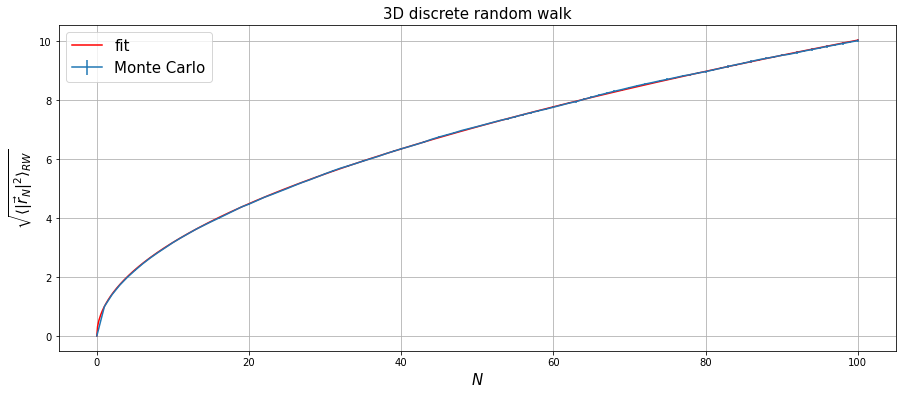

D_fit =  [0.50343037]


In [103]:
# following code produces a runtime warning due to division by zero
# can be ignored because it leads to nan values for the error on first two N_step values that are handled by plt.errorbar 

N_steps, r2_mean, r2_error = np.loadtxt("data/discrete_walk.txt", delimiter=',', skiprows=1, unpack = 'True')
r_mean = np.sqrt(r2_mean)
r_error = r2_error / (2*np.sqrt(r2_mean)) # propragate error on squared mean

plt.figure(figsize=(15,6))
plt.errorbar(N_steps, r_mean, r_error, label='Monte Carlo')
plt.xlabel(r"$N$", size=15)
plt.ylabel(r"$\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$", size=15)
plt.title("3D discrete random walk", size=15)

def fit_func(t, D):
    return np.sqrt(2*D*t)

from scipy.optimize import curve_fit

D_fit, D_error = curve_fit(fit_func, N_steps, r_mean)

plt.plot(np.linspace(0, 100, 1000), fit_func(np.linspace(0, 100, 1000), D_fit), color='r', label='fit')

plt.grid()
plt.legend(fontsize=15)
plt.show()

print("D_fit = ", D_fit)

<ipython-input-104-7e3cce077cd2>:3: RuntimeWarning: invalid value encountered in true_divide
  r_error = r2_error / (2*np.sqrt(r2_mean)) # propragate error on squared mean


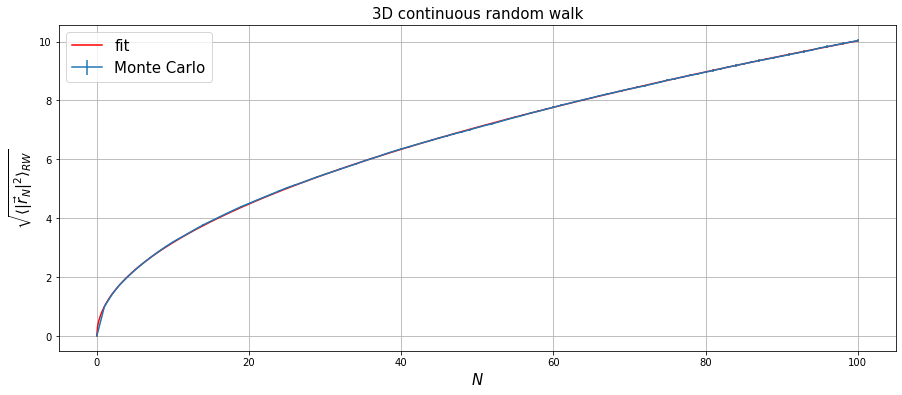

D_fit =  [0.50256254]


In [104]:
N_steps, r2_mean, r2_error = np.loadtxt("data/continuous_walk.txt", delimiter=',', skiprows=1, unpack = 'True')
r_mean = np.sqrt(r2_mean)
r_error = r2_error / (2*np.sqrt(r2_mean)) # propragate error on squared mean

plt.figure(figsize=(15,6))
plt.errorbar(N_steps, r_mean, r_error, label='Monte Carlo')
plt.xlabel(r"$N$", size=15)
plt.ylabel(r"$\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$", size=15)
plt.title("3D continuous random walk", size=15)

D_fit, D_error = curve_fit(fit_func, N_steps, r_mean)

plt.plot(np.linspace(0, 100, 1000), fit_func(np.linspace(0, 100, 1000), D_fit), color='r', label='fit')

plt.grid()
plt.legend(fontsize=15)
plt.show()

print("D_fit = ", D_fit)